# Model Performance Comparison

This notebook compares the performance of three model variants:
1. Base model (faster_rcnn.onnx)
2. Higher learning rate model (faster_rcnn_higher_lr.onnx)
3. Data augmentation model (faster_rcnn_data_augmentation.onnx)

In [1]:
# Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pandas as pd
import seaborn as sns
from metrics_utils import load_metrics

In [2]:
# Load metrics
base_metrics = load_metrics('base', phase='training')
print("Base model metrics:")
print(json.dumps(base_metrics, indent=2))

Base model metrics:
{
  "epochs": [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19
  ],
  "train_loss": [
    0.1889925135130232,
    0.101041360422718,
    0.07919094627503594,
    0.060569524225662856,
    0.057066046309842404,
    0.05492938354435794,
    0.05252930875052306,
    0.05216530721747514,
    0.05204786068637564,
    0.05187532437419651,
    0.0519065357406031,
    0.051759504791512236,
    0.05180599927425585,
    0.05172123642080159,
    0.0517790664539293,
    0.051886513271064874,
    0.051687337865783306,
    0.05158643688542473,
    0.05151029712573848,
    0.051776564538930404
  ],
  "learning_rate": [
    0.005000000000000003,
    0.005000000000000003,
    0.0005000000000000003,
    0.0005000000000000003,
    0.0005000000000000003,
    5.0000000000000036e-05,
    5.0000000000000036e-05,
    5.0000000000000036e-05,
    5.000000000000004e-06,
    5.000000000000004e

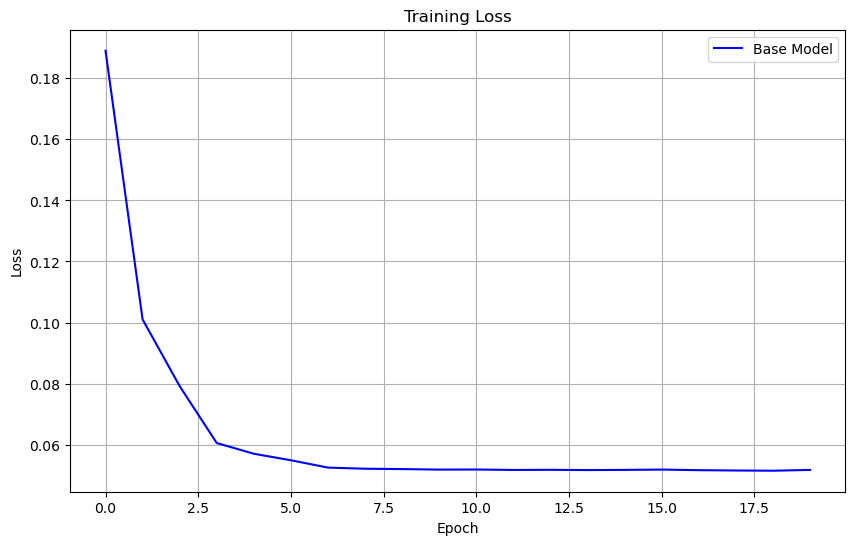

In [3]:
# Plot Training Loss
plt.figure(figsize=(10, 6))
if base_metrics is not None:
    plt.plot(base_metrics['epochs'], base_metrics['train_loss'], 'b-', label='Base Model')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

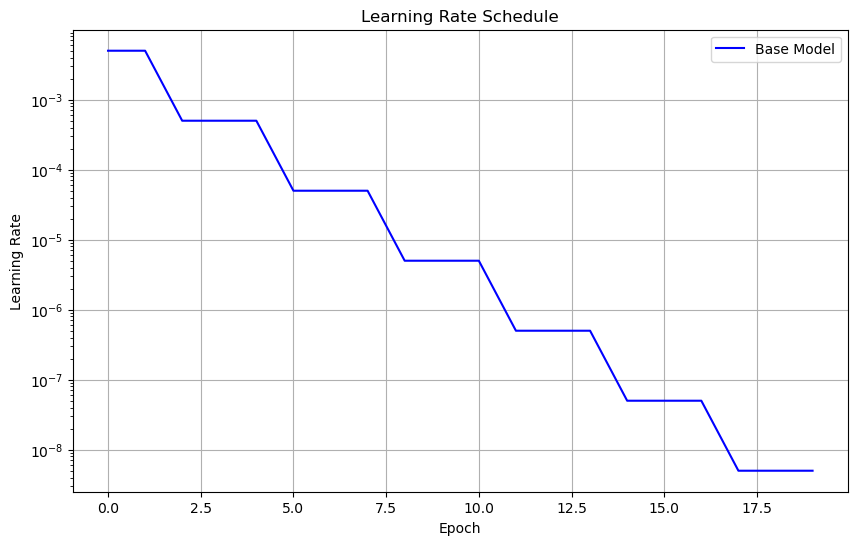

In [4]:
# Plot Learning Rate Schedule
plt.figure(figsize=(10, 6))
if base_metrics is not None:
    plt.plot(base_metrics['epochs'], base_metrics['learning_rate'], 'b-', label='Base Model')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

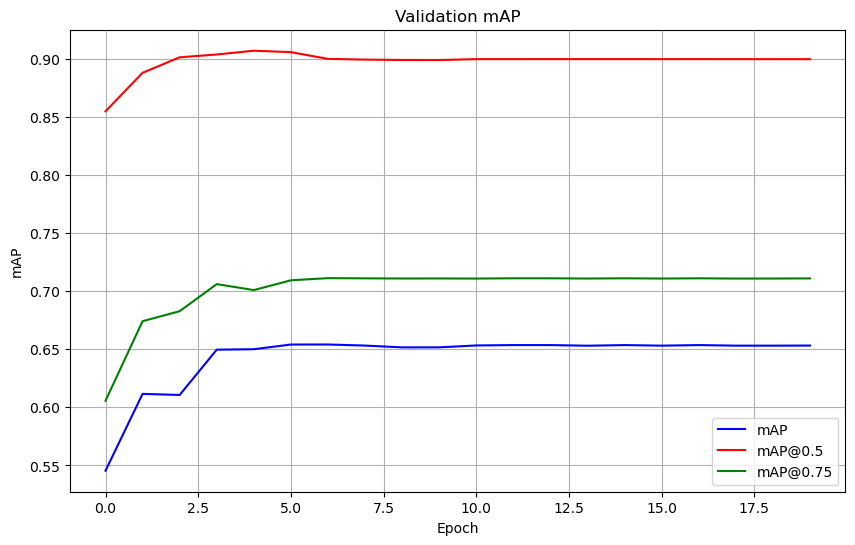

In [5]:
# Plot Validation mAP
plt.figure(figsize=(10, 6))
if base_metrics is not None:
    plt.plot(base_metrics['epochs'], base_metrics['val_map'], 'b-', label='mAP')
    plt.plot(base_metrics['epochs'], base_metrics['val_map_50'], 'r-', label='mAP@0.5')
    plt.plot(base_metrics['epochs'], base_metrics['val_map_75'], 'g-', label='mAP@0.75')
plt.title('Validation mAP')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)
plt.show()

## Model Comparison
Note: These comparisons will be populated once metrics from all models are available.

In [6]:
# Load all available metrics
models = ['base', 'higher_lr', 'data_augmentation']
metrics = {}

for model in models:
    data = load_metrics(model, phase='training')
    if data is not None:
        metrics[model] = data
print(f"Found metrics for {len(metrics)} models: {list(metrics.keys())}")

Found metrics for 3 models: ['base', 'higher_lr', 'data_augmentation']


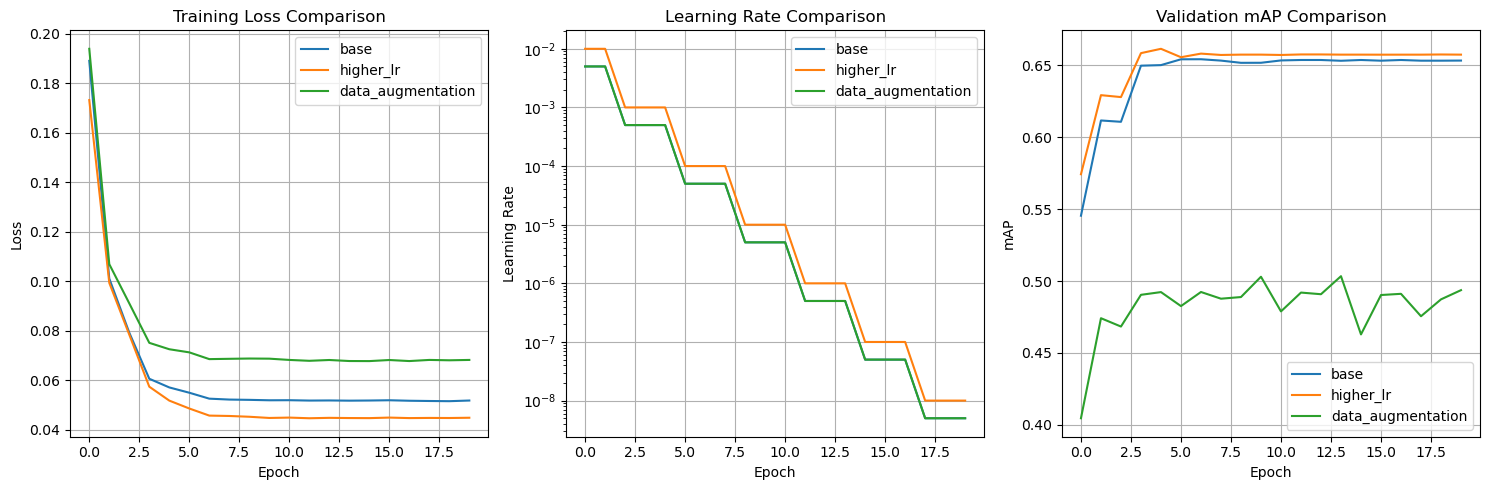

In [7]:
# Plot model comparisons
if len(metrics) > 1:  # Only plot if we have multiple models to compare
    # Plot training loss comparison
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    for model, data in metrics.items():
        plt.plot(data['epochs'], data['train_loss'], '-', label=model)
    plt.title('Training Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot learning rate comparison
    plt.subplot(132)
    for model, data in metrics.items():
        plt.plot(data['epochs'], data['learning_rate'], '-', label=model)
    plt.title('Learning Rate Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    
    # Plot mAP comparison
    plt.subplot(133)
    for model, data in metrics.items():
        plt.plot(data['epochs'], data['val_map'], '-', label=model)
    plt.title('Validation mAP Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("Need metrics from multiple models for comparison")